In [56]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [57]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [58]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.cm as cm
from matplotlib import offsetbox
import matplotlib
import pandas as pd
import numpy as np
from numpy import genfromtxt
import seaborn as sns

In [59]:
matplotlib.rc('xtick', labelsize=25) 
matplotlib.rc('ytick', labelsize=25)

font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 25}

matplotlib.rc('font', **font)

In [60]:
df        = pd.read_csv('INPUT_FEATURES/df.csv')

In [61]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [62]:
df

,x,y,z,dkdx,dkdy,dkdz,Uxx,Uxy,Uxz,Uyx,...,wD,C1,C2,C3,PC2,PC3,xi,eta,xB,yB
0,-3.72173,0.001324,-9.843840e-22,-5.275740e-05,0.000022,-3.096600e-15,-0.010028,3.302330e-05,3.010160e-16,-0.004876,...,0.997729,0.007126,2.678754e-02,0.980501,-2.021510e-06,0.000341,-1.003572e-02,0.010658,0.497377,0.849139
1,-3.62251,0.001316,-3.374580e-20,-5.345140e-05,0.000020,0.000000e+00,-0.000309,-3.402050e-05,-6.143760e-16,-0.001991,...,0.997780,0.000900,7.994650e-04,0.999855,-7.050273e-10,0.000002,-7.064130e-04,0.000843,0.500828,0.865900
2,-3.52330,0.001308,3.629530e-20,-5.163930e-05,0.000021,0.000000e+00,0.000990,-6.773300e-06,6.848840e-17,-0.001744,...,0.997873,0.001759,1.896949e-03,0.996222,5.116927e-10,0.000002,6.348334e-04,0.000762,0.499870,0.862754
3,-3.42408,0.001300,-2.839730e-20,-5.007280e-05,0.000021,-3.215890e-15,0.001942,-5.334470e-06,1.664600e-16,-0.001589,...,0.998010,0.002890,3.436539e-03,0.992346,2.097053e-09,0.000003,1.015921e-03,0.001035,0.499063,0.859397
4,-3.32487,0.001291,3.295030e-20,-4.869180e-05,0.000021,0.000000e+00,0.002800,-3.639220e-06,6.812060e-16,-0.001455,...,0.998189,0.003989,4.817941e-03,0.988774,4.686836e-09,0.000005,1.328260e-03,0.001328,0.498377,0.856304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15291,19.76260,0.998051,7.430330e-17,3.054580e-08,-0.009954,-6.267570e-18,0.000360,-1.271970e-07,1.070060e-18,-63.598800,...,0.000997,0.002199,4.020557e-08,1.000000,-3.401596e-24,0.000005,-1.193670e-08,0.001270,0.502199,0.866025
15292,19.86180,0.998052,-2.106190e-20,3.036010e-08,-0.009959,-3.747760e-22,0.000528,4.683470e-07,8.814250e-18,-63.626500,...,0.000997,0.002200,6.697421e-08,1.000000,9.868206e-20,0.000005,3.667775e-07,0.001270,0.502200,0.866025
15293,19.96110,0.998052,-2.212710e-18,3.089950e-08,-0.009961,3.748320e-22,0.000178,-1.821290e-06,2.005410e-18,-63.694500,...,0.000996,0.002202,4.017697e-08,1.000000,1.680921e-26,0.000005,2.033164e-09,0.001271,0.502202,0.866025
15294,20.06030,0.998052,-2.496730e-18,3.134750e-08,-0.009970,0.000000e+00,0.000472,3.547520e-06,-2.340190e-18,-63.670900,...,0.000996,0.002201,2.675900e-08,1.000000,9.849679e-20,0.000005,3.665479e-07,0.001271,0.502201,0.866025


In [63]:
labels = np.loadtxt('labels.txt')

In [64]:
labels = labels.reshape(-1,1).astype(int)

In [65]:
labels.shape

(15296, 1)

In [66]:
df_labels = pd.DataFrame(data=labels)

In [67]:
df['labels'] = df_labels

In [68]:
n_clusters = len(np.unique(labels)); print(n_clusters)

6


In [69]:
points = df[['x','y','z','labels']]

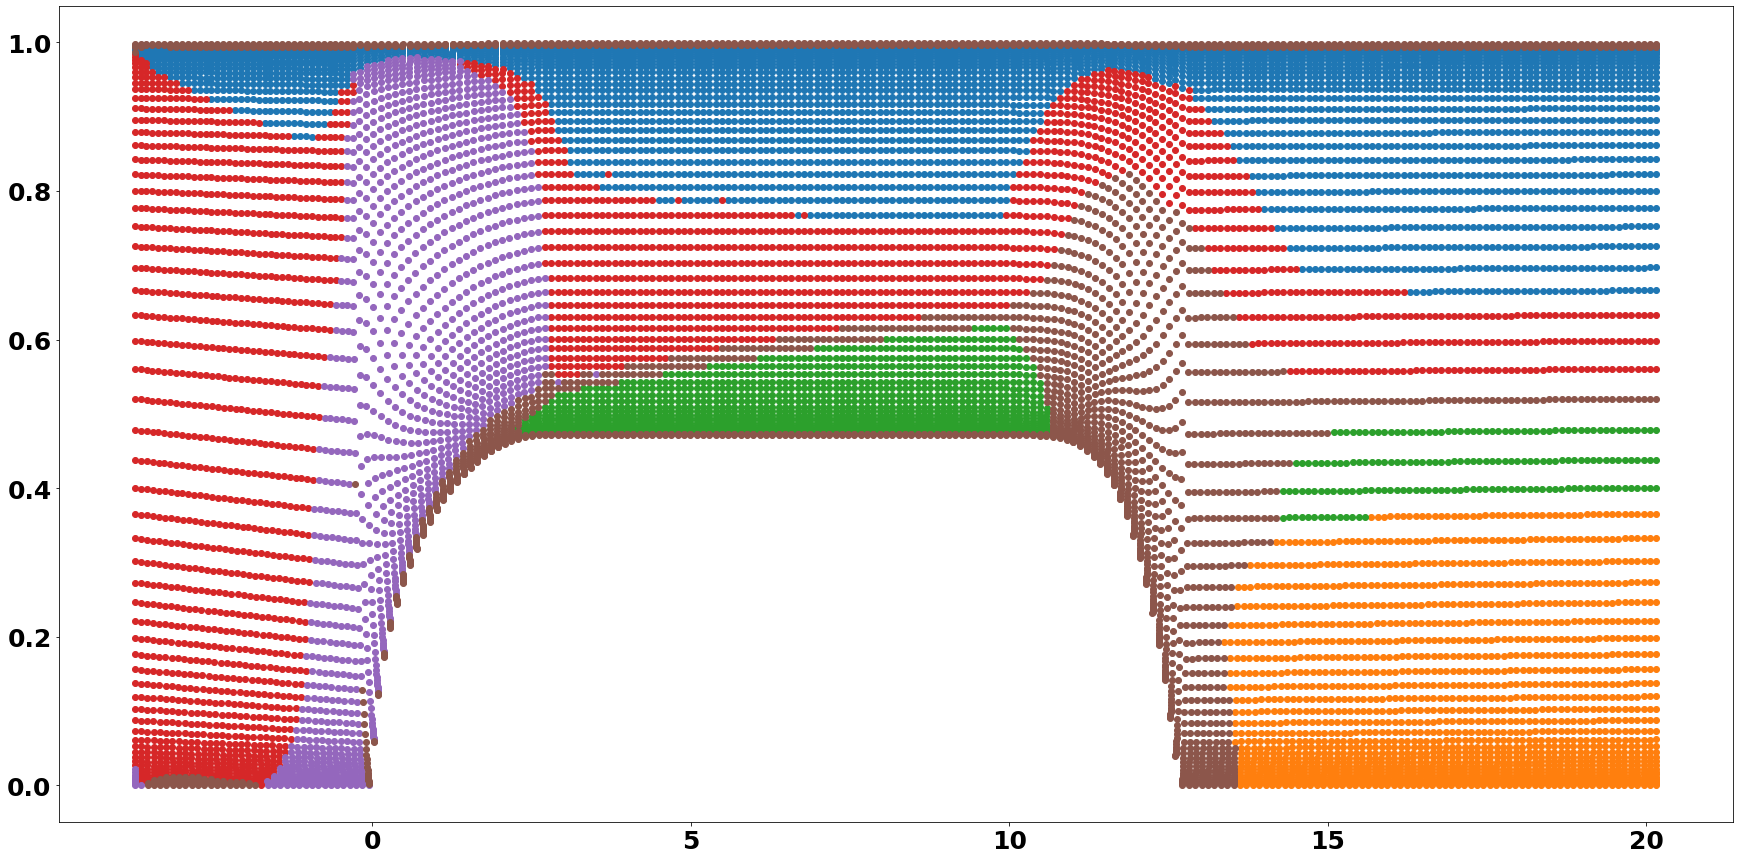

In [79]:
clusters = []
for c in range(n_clusters):
    clusters.append(points[points['labels']==c])
    
for c in range(n_clusters):    
    clusters[c].to_csv("cluster"+str(c)+".csv")

plt.figure(figsize=(30,15))
for c in range(n_clusters):    
    plt.scatter(clusters[c]['x'], clusters[c]['y'])

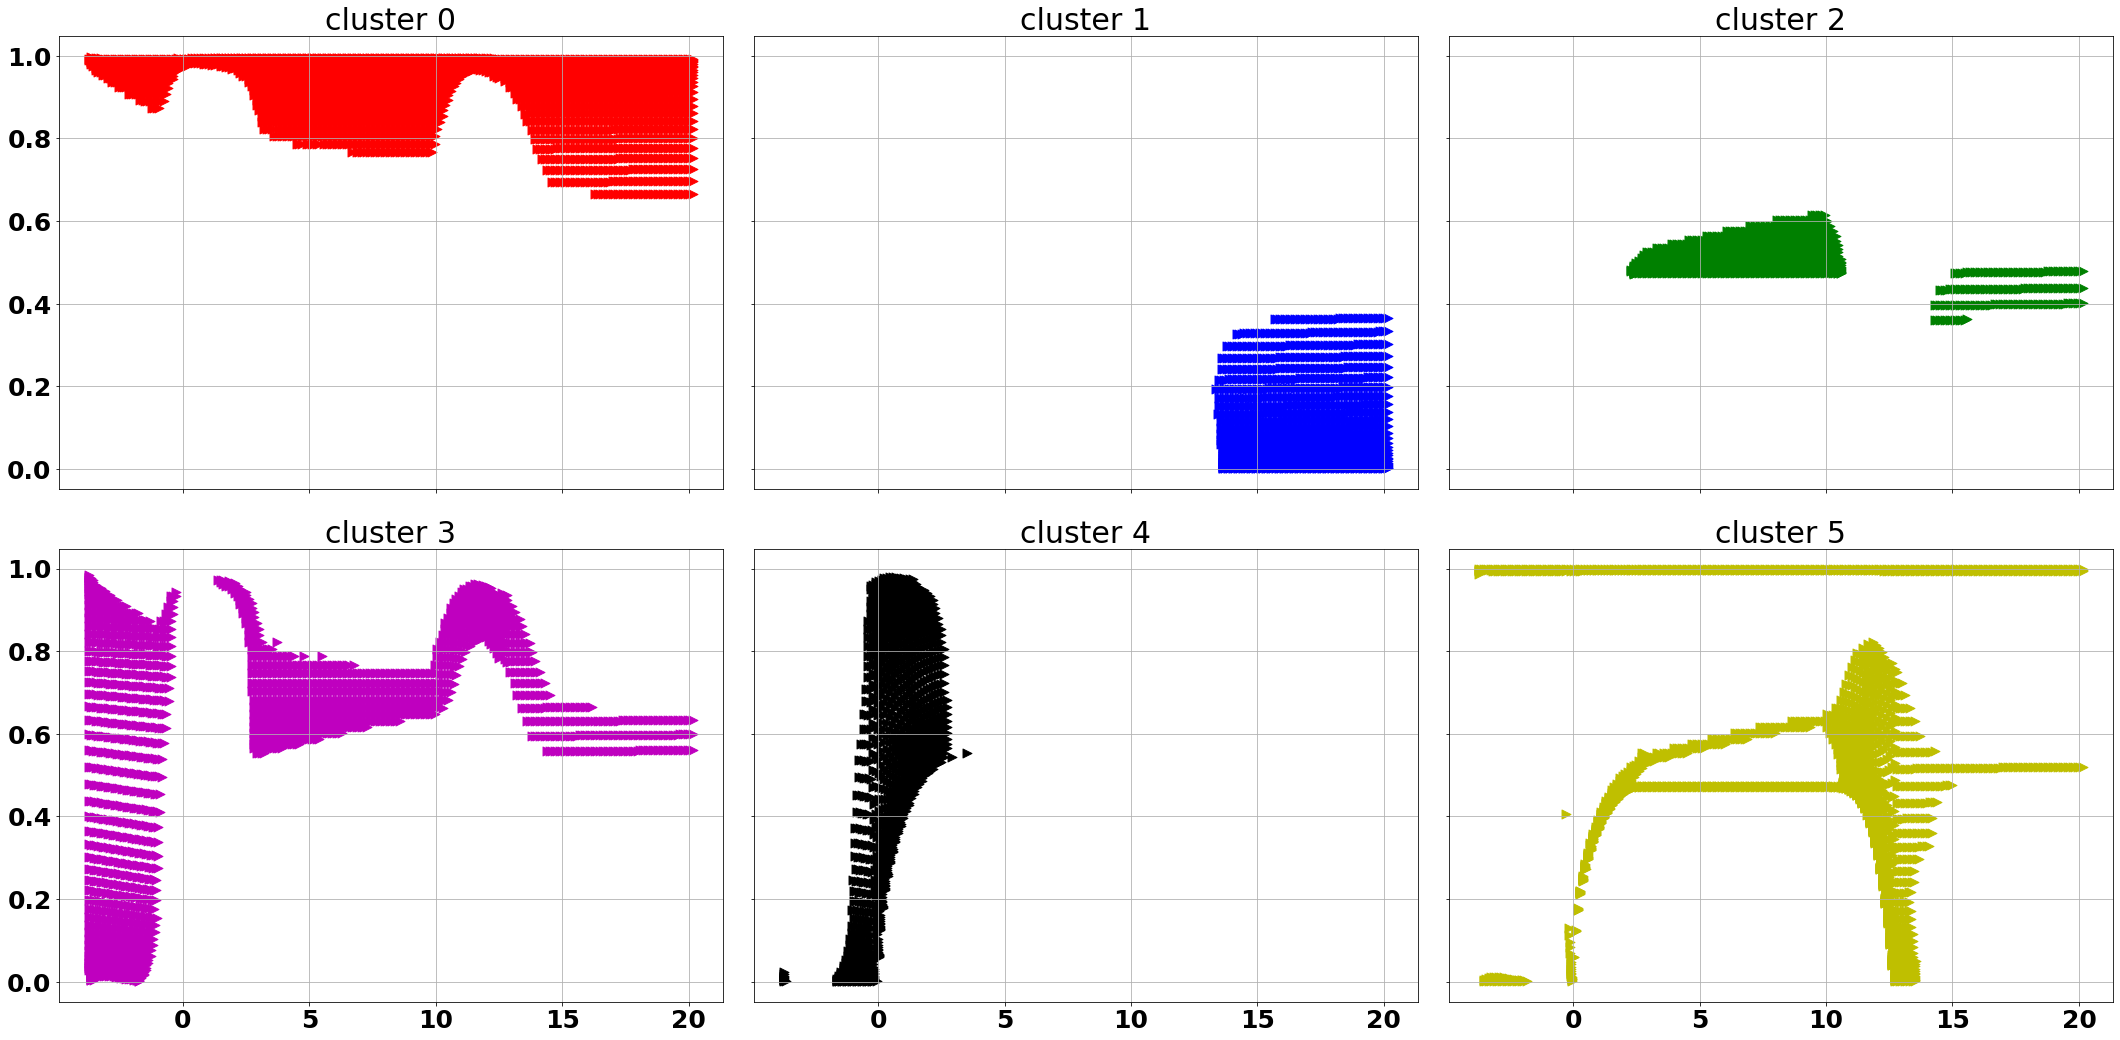

In [71]:
colors = ['r', 'b', 'g', 'm', 'k', 'y']

fig, axs = plt.subplots(2, 3, figsize=(30, 15), sharex=True, sharey=True)

for c in range(n_clusters):
    
    if (c == 0):
        ax0 = 0
        ax1 = 0
    if (c == 1):
        ax0 = 0
        ax1 = 1
    if (c == 2):
        ax0 = 0
        ax1 = 2
    if (c == 3):
        ax0 = 1
        ax1 = 0
    if (c == 4):
        ax0 = 1
        ax1 = 1
    if (c == 5):
        ax0 = 1
        ax1 = 2
    
    axs[ax0,ax1].scatter(clusters[c]['x'], clusters[c]['y'], s=80, c=colors[c], marker=">")
    axs[ax0,ax1].set_title("cluster "+str(c))
    axs[ax0,ax1].grid()

plt.tight_layout()
plt.show()

In [72]:
profiles_bow    = ['XoRm0.1','XoR0.0','XoRp0.1','XoRp0.2','XoRp0.3','XoRp0.4', 'XoRp0.5','XoRp0.6','XoRp0.7','XoRp0.8','XoRp0.9','XoRp1.0','XoRp1.1'] # BOW
profiles_center = ['XoRp4.17','XoRp4.27','XoRp4.37','XoRp4.47','XoRp4.57','XoRp4.67','XoRp4.77','XoRp4.87','XoRp4.97','XoRp5.07','XoRp5.17','XoRp5.27','XoRp5.37','XoRp5.47'] # CENTER
profiles_stern  = ['XoRp8.67','XoRp8.92','XoRp9.17','XoRp9.42','XoRp9.67','XoRp9.92','XoRp10.17', 'XoRp10.42','XoRp10.67','XoRp10.92','XoRp11.17','XoRp11.42','XoRp11.67', 'XoRp11.92','XoRp12.17'] # STERN
profiles_wake   = ['XoRp12.9167','XoRp13.17','XoRp13.4167','XoRp13.67','XoRp13.9167','XoRp14.17','XoRp14.4167','XoRp14.67','XoRp14.9167','XoRp15.17','XoRp15.4167','XoRp15.67','XoRp15.9167','XoRp16.17','XoRp16.4167'] # WAKE

profiles_all = profiles_bow + profiles_center + profiles_stern + profiles_wake

xs = np.array([-0.1,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,4.17,4.27,4.37,4.47,4.57,4.67,4.77,4.87,4.97,5.07,5.17,5.27,5.37,5.47,8.67,8.92,9.17,9.42,9.67,9.92,10.17,10.42,10.67,10.92,11.17,11.42,11.67,11.92,12.17,12.9167,13.17,13.4167,13.67,13.9167,14.17,14.4167,14.67,14.9167,15.17,15.4167,15.67,15.9167,16.17,16.4167])

In [73]:
exp = np.loadtxt('BoRDataCompilation_Medium.dat')

In [74]:
exp.shape

(8725, 8)

In [75]:
len(profiles_all), len(xs)

(57, 57)

In [76]:
!mkdir cluster0 cluster1 cluster2 cluster3 cluster4 cluster5

mkdir: cannot create directory ‘cluster0’: File exists
mkdir: cannot create directory ‘cluster1’: File exists
mkdir: cannot create directory ‘cluster2’: File exists
mkdir: cannot create directory ‘cluster3’: File exists
mkdir: cannot create directory ‘cluster4’: File exists
mkdir: cannot create directory ‘cluster5’: File exists


cluster: 0
cluster: 1
cluster: 2
cluster: 3
cluster: 4
cluster: 5


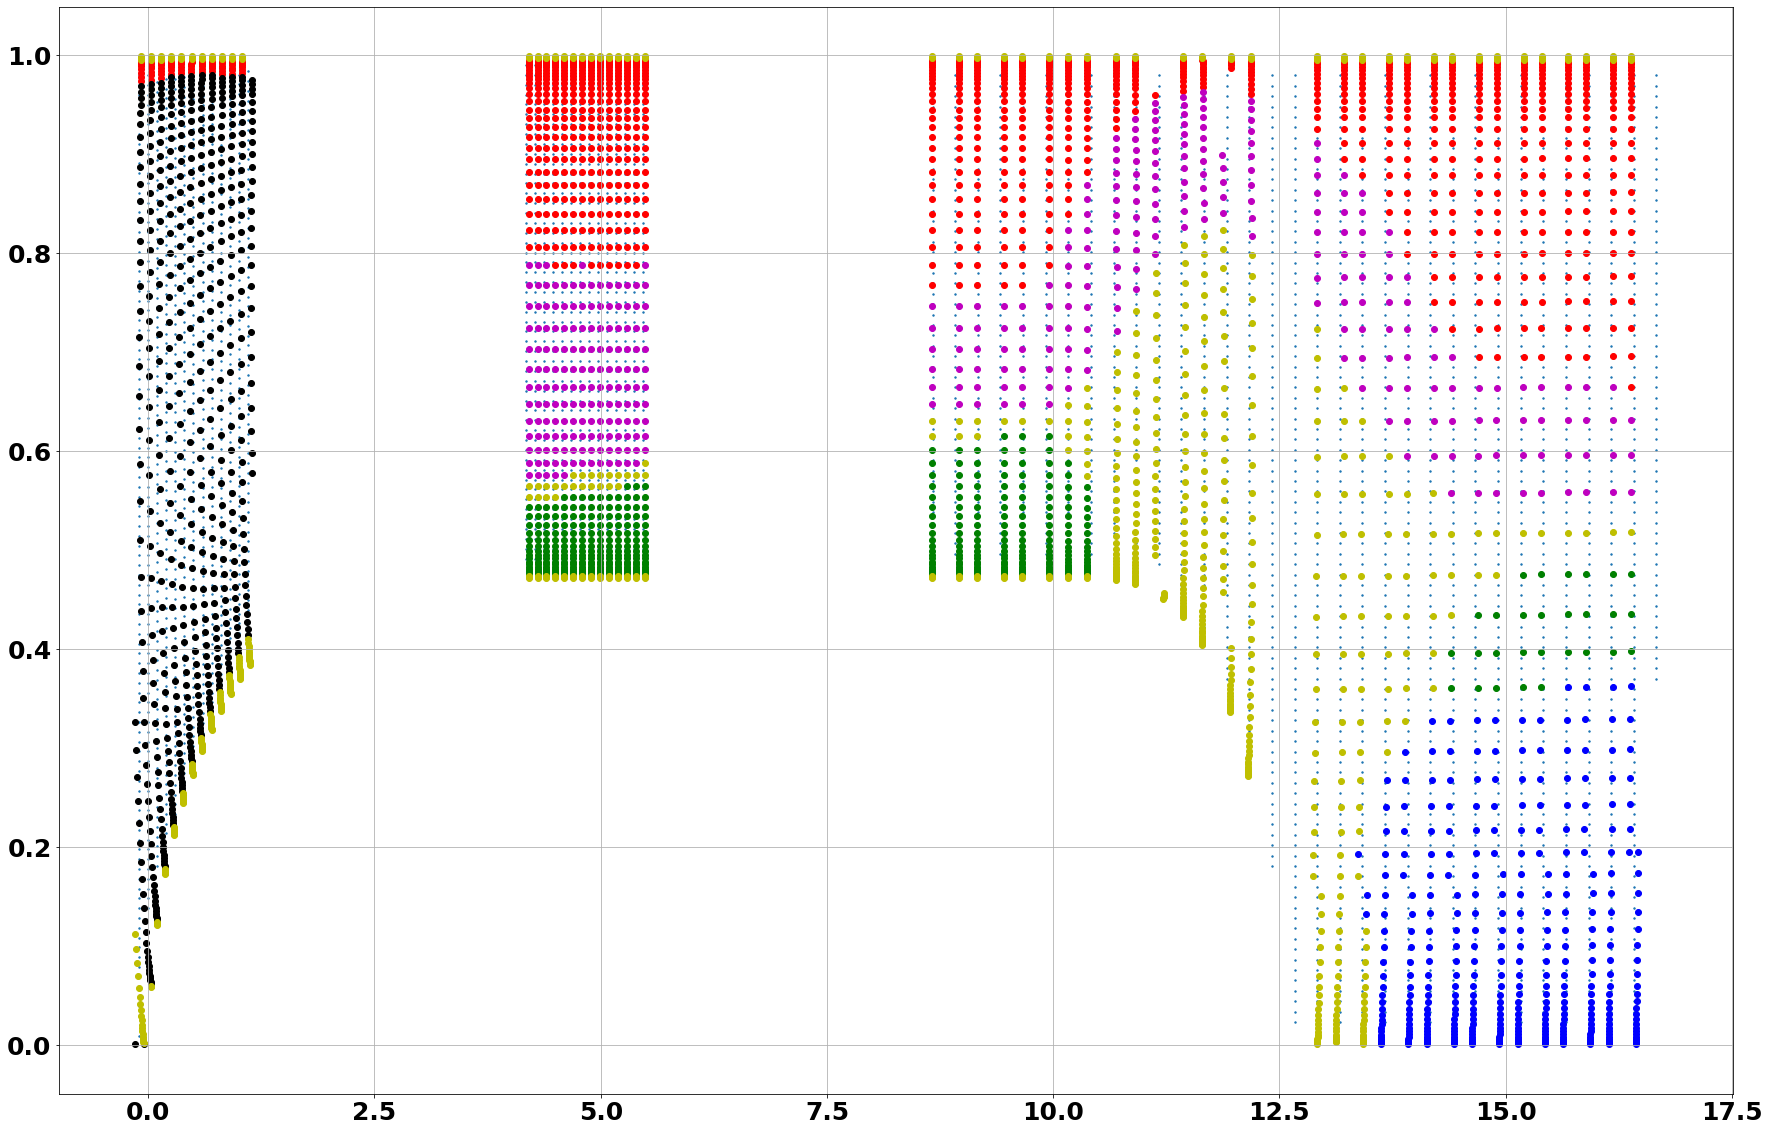

In [77]:
eps = 0.05 # important parameter: left and right margin to search for points respect to nominal abscissa. Smaller values will make it more precise but fewer points

colors = ['r', 'b', 'g', 'm', 'k', 'y']

plt.figure(figsize=(30,20))
plt.scatter(exp[:4000,0],exp[:4000,1], s=2)

for c in range(n_clusters):
    print('cluster:',c)

    for i in range(len(xs)):
        
        cluster_data    = clusters[c][(clusters[c]['x']>=xs[i]-eps)&(clusters[c]['x']<=xs[i]+eps)]
        cluster_path    = "cluster"+str(c)+"/"
        cluster_profile = "XoR"+str(xs[i])+".xy"
        np.savetxt(cluster_path+cluster_profile, cluster_data[['x','y','z']])
      
        plt.scatter(cluster_data['x'], cluster_data['y'], c=colors[c])

        with open(cluster_path+cluster_profile, 'r') as f:
            lines = f.readlines()

        with open(cluster_path+cluster_profile, 'w') as f:
            f.writelines([''.join(['(', line.strip(), ')\n']) for line in lines])
    
plt.grid()